## Accelerated Python for Engineering Applications

### 1. Setup
1) NumPy : Numerical computing, vector/matrix operation
2) Pandas :	Data manipulation, structured data (DataFrames).
3) Matplotlib : Foundational scientific plotting.
4) Seaborn : Advanced statistical visualization (built on Matplotlib).

In [1]:
!pip install pandas matplotlib seaborn numpy


In [2]:
# Import libraries:
import numpy as np      # for fast math with arrays and matrices
import pandas as pd     # for working with tables and data (like Excel)
import matplotlib.pyplot as plt  # for making basic charts and plots
import seaborn as sns   # for making prettier charts easily

# Set a simple, clean style for all plots
sns.set_style("whitegrid")

print("Libraries imported successfully!")  # confirm imports worked

Libraries imported successfully!


### 2. Numerical Computing with NumPy

Focus: Matrix operations, broadcasting, and vectorization (mapping MATLAB concepts to Python). For engineers, the NumPy array is the equivalent of a MATLAB array/matrix.

#### 2.1 Creating Arrays (Vectrs and Matrices)


In [3]:
# === 1D Array: Vector example (MATLAB equivalent: row/column vector) ===
A = np.array([10, 20, 30, 40, 50])  
print("Vector A (1D):", A)
print("Shape of A:", A.shape)

# === 2D Array: Matrix example (MATLAB equivalent: matrix) ===
B = np.array([
    [1.5, 2.5, 3.5],
    [4.5, 5.5, 6.5]
])
print("\nMatrix B (2D):\n", B)
print("Shape of B:", B.shape)

# === Special matrix/vector creation (MATLAB: zeros, linspace) ===

# Create a 3x4 matrix of zeros
C = np.zeros((3, 4))  
print("\nMatrix C (Zeros):\n", C)

# Create a vector of 50 linearly spaced values between 0 and 10
D = np.linspace(0, 10, 50)  
print("\nVector D (Linspace - first 5 elements):\n", D[:5])

Vector A (1D): [10 20 30 40 50]
Shape of A: (5,)

Matrix B (2D):
 [[1.5 2.5 3.5]
 [4.5 5.5 6.5]]
Shape of B: (2, 3)

Matrix C (Zeros):
 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Vector D (Linspace - first 5 elements):
 [0.         0.20408163 0.40816327 0.6122449  0.81632653]


#### 2.2 Matrix Operations

In [4]:
# Define sample 2x2 matrices for operation demonstration
M1 = np.array([[1, 2],
               [3, 4]])
M2 = np.array([[5, 6],
               [7, 8]])

# --- Element-wise multiplication (equivalent to MATLAB's '.*')
element_wise = M1 * M2

print("Element-wise Multiplication:\n", element_wise)

# --- Matrix multiplication (dot product; equivalent to MATLAB's '*')
matrix_product = M1 @ M2
print("\nMatrix Multiplication (M1 @ M2):\n", matrix_product)

# --- Transpose the matrix (equivalent to MATLAB's M1')
m1_transposed = M1.T
print("\nTranspose of M1:\n", m1_transposed)

Element-wise Multiplication:
 [[ 5 12]
 [21 32]]

Matrix Multiplication (M1 @ M2):
 [[19 22]
 [43 50]]

Transpose of M1:
 [[1 3]
 [2 4]]


#### 2.3 Broadcasting (Essential for Engineers)


Focus: Performing an operation between an array and a single number (scalar), or between arrays of different shapes, without explicit loops. This is common in sensor data calibration.


In [5]:
# Developer note: Demonstration of broadcasting in numpy for sensor calibration and unit conversion

# --- Sensor Calibration with Broadcasting ---
Sensor_Readings = np.array([25.1, 25.3, 24.9, 25.0])  # Raw sensor readings in Celsius
Offset_Error = 1.5                                    # Calibration offset in Celsius

# Apply offset to all readings (vectorized operation, no loop needed)
Calibrated_Readings = Sensor_Readings + Offset_Error

print("Original Readings:", Sensor_Readings)
print("Calibrated Readings:", Calibrated_Readings)

# --- Unit Conversion: Meters to Millimeters ---
Meters = np.array([0.1, 0.5, 1.2])                   # Distances in meters

# Convert entire array from meters to millimeters
Millimeters = Meters * 1000

print("\nDistances in mm:", Millimeters)


Original Readings: [25.1 25.3 24.9 25. ]
Calibrated Readings: [26.6 26.8 26.4 26.5]

Distances in mm: [ 100.  500. 1200.]


### 3. Data Manipulation with Pandas

Focus: Handling structured data, time-series analysis, and I/O operations for engineering datasets (CSV, Excel, JSON). The Pandas DataFrame is the central object for structured data analysis.


#### 3.1 Creating a DataFrame (The Data Table)

In [6]:
# --- Developer Note: Creating structured test data for material properties analysis ---

# Step 1: Prepare test data dictionary
material_data = {
    'Material_ID': [101, 102, 103, 104, 105],
    'Tensile_Strength_MPa': [450, 510, 390, 480, 550],
    'Heat_Treatment': ['Annealed', 'Quenched', 'Annealed', 'Normalized', 'Quenched']
}

# Step 2: Convert dictionary to pandas DataFrame
df = pd.DataFrame(material_data)

# Step 3: Preview the data and data types
print("--- Material Test Data (First 5 Rows) ---\n")
print(df)
print("\nData Types (dtypes):\n", df.dtypes)

--- Material Test Data (First 5 Rows) ---

   Material_ID  Tensile_Strength_MPa Heat_Treatment
0          101                   450       Annealed
1          102                   510       Quenched
2          103                   390       Annealed
3          104                   480     Normalized
4          105                   550       Quenched

Data Types (dtypes):
 Material_ID              int64
Tensile_Strength_MPa     int64
Heat_Treatment          object
dtype: object


#### 3.2 Loading and Inspecting Engineering Datasets (I/O Operations)

In [11]:

# URL of the dataset (CSV file)
# This dataset contains power plant sensor readings and the corresponding power output.
# It is used to analyze how environmental conditions affect electricity generation.

data_url = "/Users/vivaansharma/Desktop/ML-DL-Notebooks/16th_December/Combined_Cycle_Power_Plant_Data.csv"

# Read the CSV file from the URL into a DataFrame
df = pd.read_csv(data_url)

# Rename columns to more understandable names
df.columns = ['Temp (C)', 'Vac (cm Hg)', 'Press (mbar)', 'Hum (%)', 'Power (MW)']

# Print shape (rows, columns)
print("Shape of data:", df.shape)

# Show the first 5 rows
print(df.head())

# Show information about the DataFrame
df.info()

Shape of data: (9568, 5)
   Temp (C)  Vac (cm Hg)  Press (mbar)  Hum (%)  Power (MW)
0       NaN        41.76       1024.07      NaN      463.26
1     25.18        62.96       1020.04    59.08      444.37
2      5.11        39.40       1012.16    92.14      488.56
3       NaN        57.32       1010.24      NaN      446.48
4     10.82        37.50       1009.23    96.62      473.90
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Temp (C)      9090 non-null   float64
 1   Vac (cm Hg)   9568 non-null   float64
 2   Press (mbar)  9568 non-null   float64
 3   Hum (%)       9090 non-null   float64
 4   Power (MW)    9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB



--- Correlation Heatmap ---


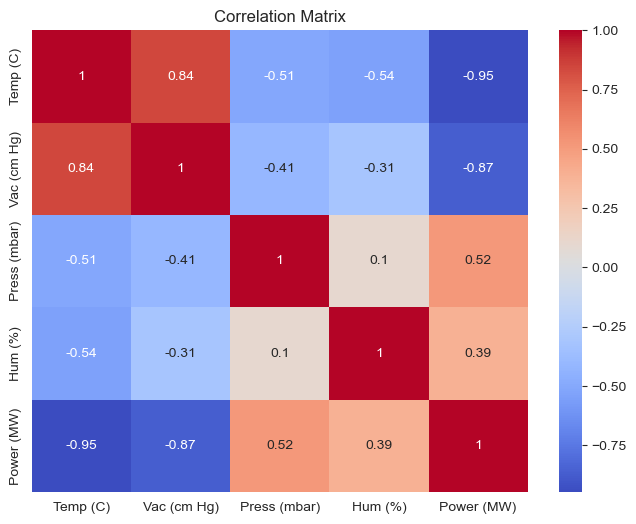


Correlation with Power (MW):
Power (MW)      1.000000
Press (mbar)    0.518429
Hum (%)         0.386816
Vac (cm Hg)    -0.869780
Temp (C)       -0.948190
Name: Power (MW), dtype: float64


In [12]:
# Import libraries
import seaborn as sns
import matplotlib.pyplot as plt

print("\n--- Correlation Heatmap ---")

# Find correlation between the columns
corr = df.corr()

# Make a heatmap to show correlations
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr,           # correlation matrix
    annot=True,     # show values on squares
    cmap='coolwarm' # color map
)
plt.title('Correlation Matrix')
plt.show()

# Show how each variable relates to Power (MW)
print("\nCorrelation with Power (MW):")
print(corr['Power (MW)'].sort_values(ascending=False))


--- Scatter Plots: Features vs. Power ---


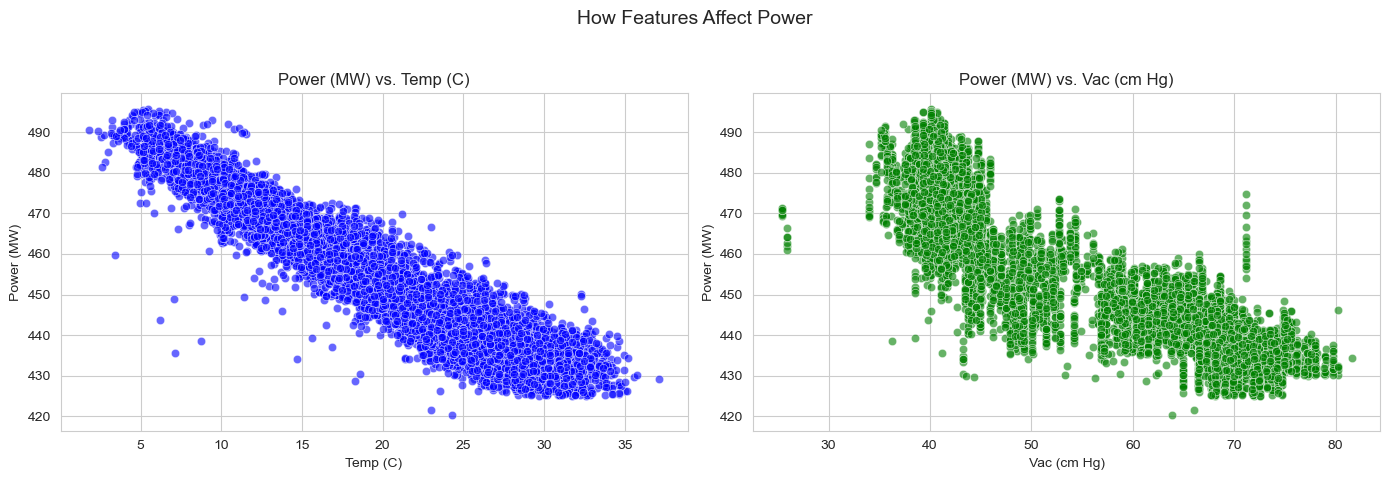


Done. You can see how these features relate to Power.


In [13]:
# Scatter plots to show how two features relate to Power (MW)
print("\n--- Scatter Plots: Features vs. Power ---")

# Choose features to compare with Power (MW)
feature1 = 'Temp (C)'      # temperature
feature2 = 'Vac (cm Hg)'   # vacuum
target = 'Power (MW)'      # target variable

# Create two scatter plots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('How Features Affect Power', fontsize=14)

# Scatter plot: Power vs Temperature
sns.scatterplot(
    x=feature1, 
    y=target, 
    data=df, 
    ax=axes[0],
    color='blue',
    alpha=0.6
)
axes[0].set_title(f'{target} vs. {feature1}')

# Scatter plot: Power vs Vacuum
sns.scatterplot(
    x=feature2, 
    y=target, 
    data=df, 
    ax=axes[1],
    color='green',
    alpha=0.6
)
axes[1].set_title(f'{target} vs. {feature2}')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

print("\nDone. You can see how these features relate to Power.")